checking if external imports are ok 

In [1]:
from superpixel_graphs.graphs.ext import greyscale_features, color_features

## .graphs

In [9]:
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as T
import numpy as np
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader

import matplotlib.pyplot as plt
import skimage as ski

In [10]:
ds = datasets.MNIST(root='mnist/test', train=False, download=True, transform=T.ToTensor())

<class 'torch.Tensor'> torch.Size([1, 28, 28])


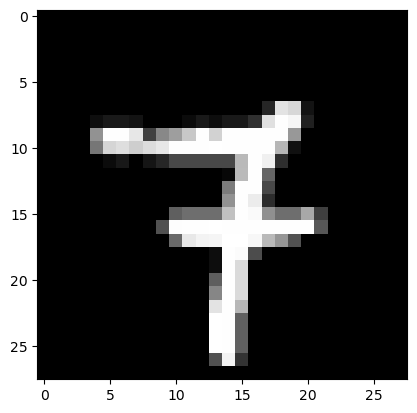

In [12]:
img, y = ds[75]
print(type(img), img.shape)
plt.imshow(img[0,:,:], cmap='gray')

## .datasets

Greyscale

In [1]:
from superpixel_graphs.datasets import SuperPixelGraphMNIST

In [2]:
test_ds  = SuperPixelGraphMNIST(root=None, 
                                n_segments=75,
                                compactness=0.1,
                                features=None,
                                graph_type='16NNSpatial',
                                slic_method='SLIC0',
                                train=False,
                                pre_select_features=False)

extension available:  True
Loading 10000 images with n_segments = 75 ...
Computing features: 


Processing...


Done in 40.623467206954956s
Selected features for 16NNSpatial graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid
MNIST Loaded.
Average number of nodes: 80.7138 with standard deviation 0.6385057243282944
Average number of edges: 2582.8416 with standard deviation 20.432183178505422


Done!


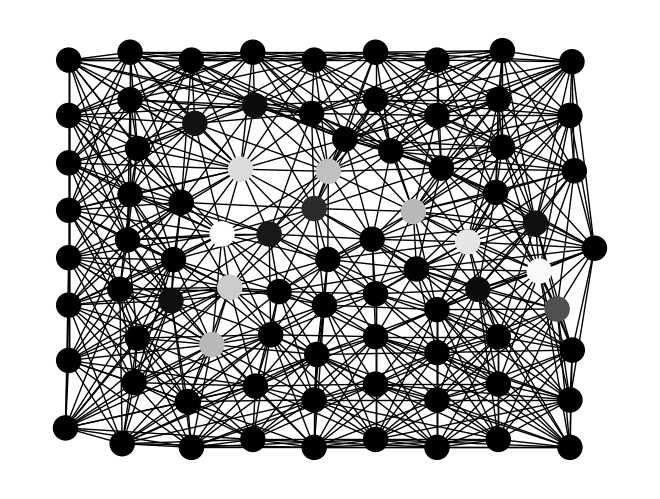

In [4]:
import networkx as nx
from torch_geometric.utils import to_networkx

index = 0
g = test_ds[index]
pos = g.pos.numpy()
features = g.x.numpy()

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')

Color

In [7]:
from superpixel_graphs.datasets import SuperPixelGraphCIFAR10

In [3]:
n_segments = 75
compactness = 0.1
graph_type = 'RAG'
slic_method = 'SLIC0'
features = ['avg_color',
            'std_deviation_color',
            'centroid',
            'std_deviation_centroid']
test_ds  = SuperPixelGraphCIFAR10(root=None, 
                                  n_segments=n_segments,
                                  compactness=compactness,
                                  features=features,
                                  graph_type=graph_type,
                                  slic_method=slic_method,
                                  train=False,
                                  pre_select_features=False)

Selected features for RAG graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid


Processing...


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10/test/cifar-10-python.tar.gz to ./cifar10/test
Loading 10000 images with n_segments = 75 ...
Computing features: 
Done in 46.288463830947876s
CIFAR10 Loaded.
Average number of nodes: 115.7441 with standard deviation 0.712190416953219
Average number of edges: 608.3594 with standard deviation 4.490615953296384


Done!


Files already downloaded and verified
0.779085 0.0


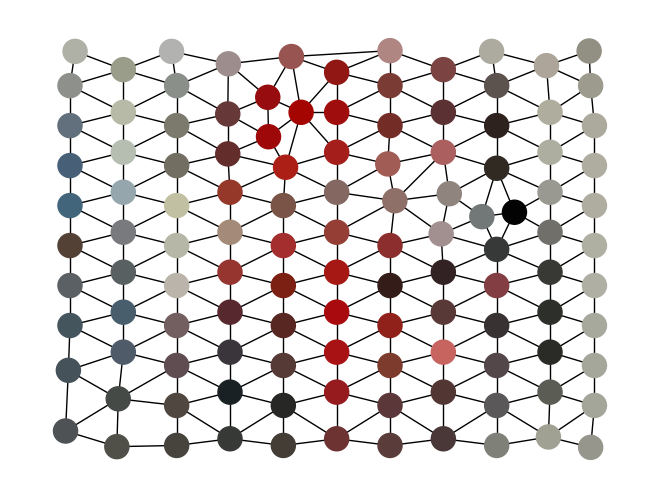

In [8]:
import networkx as nx
from torch_geometric.utils import to_networkx


idx = 23
img = test_ds.get_og_img(idx)
g = test_ds[idx]

nx_g = to_networkx(g, to_undirected=True)
nx_color = g.x[:,0:3].numpy()
print(np.max(nx_color), np.min(nx_color))
nx_pos = dict(zip(range(g.num_nodes), g.pos.numpy()))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)